https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
https://medium.com/@abbdar/first-steps-in-machine-learning-predicting-subscription-for-bank-deposits-866516b90e4

In [91]:
import pandas as pd
Bank = pd.read_csv('bank-full.csv', sep=';')

In [92]:
Bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [13]:
Bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [14]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [19]:
import datetime
Bank['dateInt']=Bank['month'].astype(str).str.zfill(2)+ Bank['day'].astype(str).str.zfill(2)
Bank['Date'] = pd.to_datetime(Bank['dateInt'], format='%b%d')

In [25]:
Bank['month'] = pd.DatetimeIndex(Bank['Date']).month

In [26]:
Bank['day'] = pd.DatetimeIndex(Bank['Date']).day

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,dateInt,Date
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no,may05,1900-05-05
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no,may05,1900-05-05
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no,may05,1900-05-05
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no,may05,1900-05-05
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no,may05,1900-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,11,977,3,-1,0,unknown,yes,nov17,1900-11-17
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,11,456,2,-1,0,unknown,yes,nov17,1900-11-17
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,11,1127,5,184,3,success,yes,nov17,1900-11-17
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,11,508,4,-1,0,unknown,no,nov17,1900-11-17


In [31]:
numerical = [
  'age','balance', 'duration', 'campaign', 'pdays', 'previous', 'day', 'month',
]
categorical = [
  'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y'
]
Banking = Bank[numerical+categorical]

In [33]:
Banking.shape

(45211, 17)

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.dpi']=100

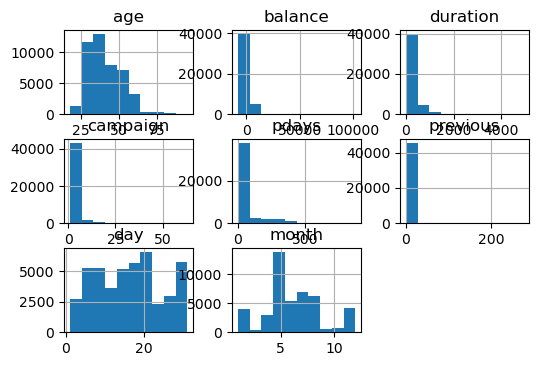

In [58]:
Banking[numerical].hist();

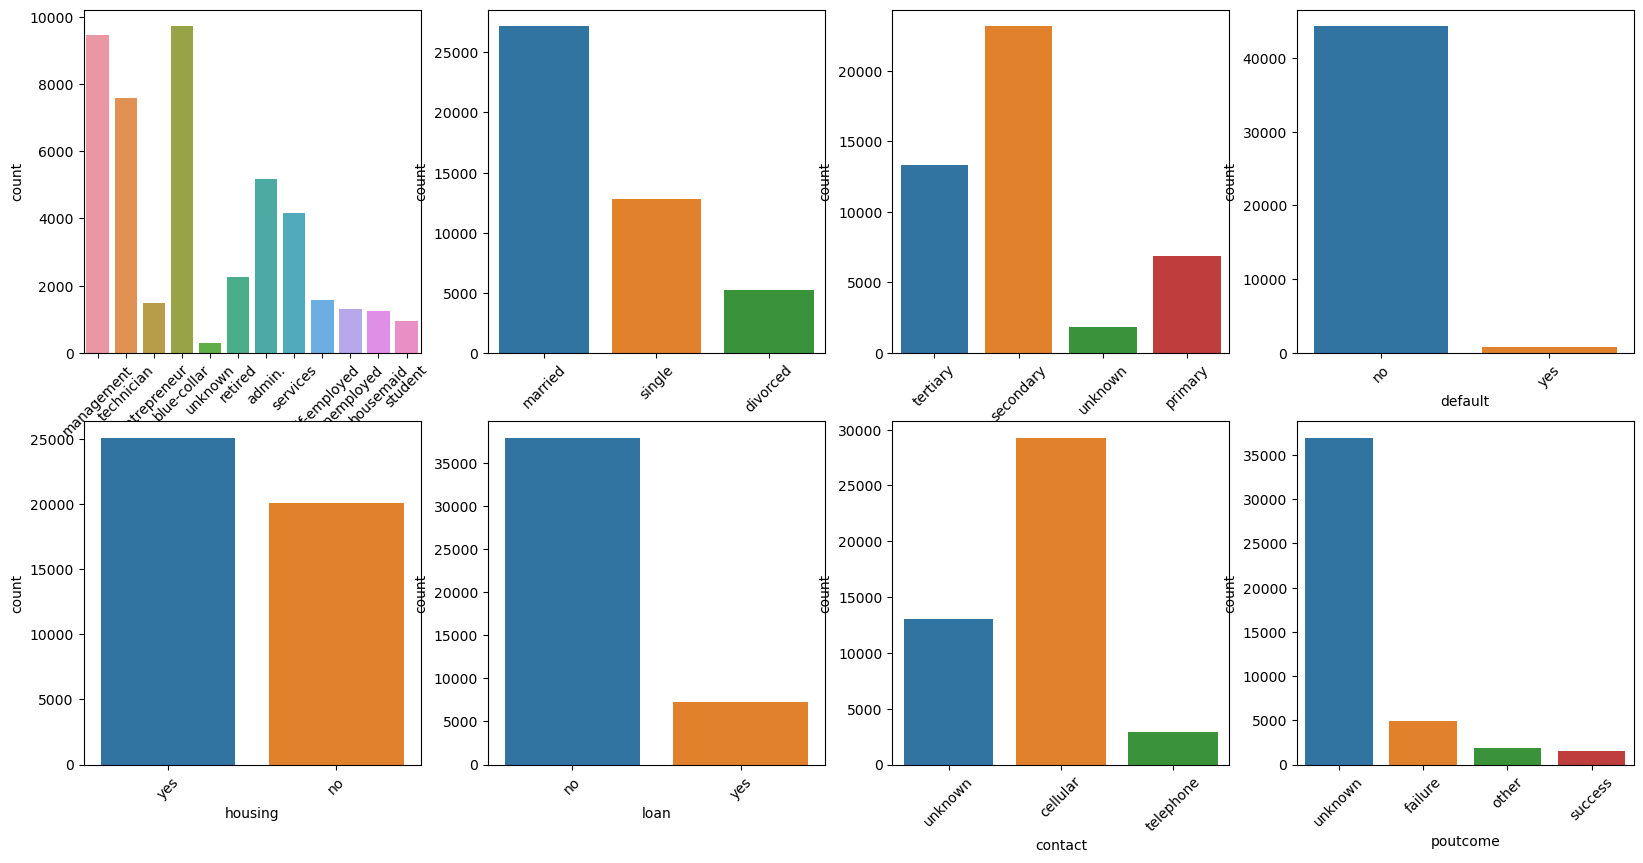

In [64]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(Banking[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

In [80]:
Banking.dtypes

age           int64
balance       int64
duration      int64
campaign      int64
pdays         int64
previous      int64
day           int64
month         int64
job          object
marital      object
education    object
default      object
housing      object
loan         object
contact      object
poutcome     object
y            object
dtype: object

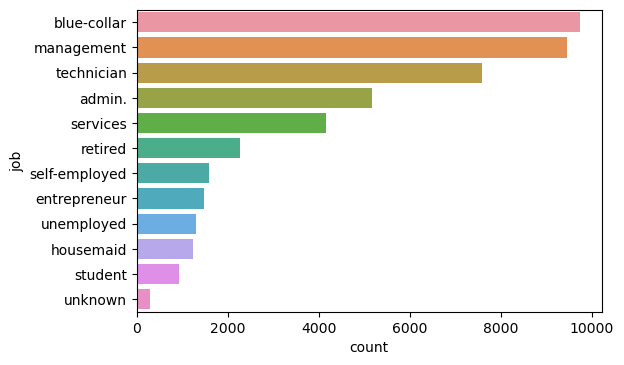

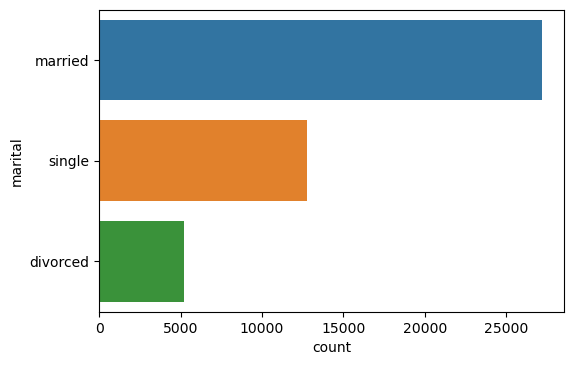

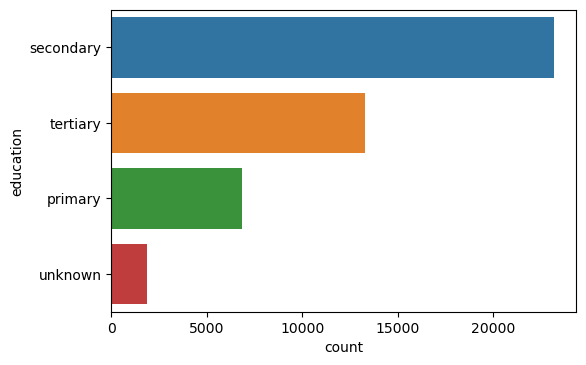

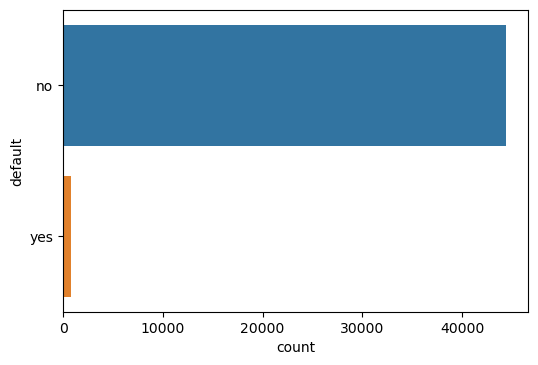

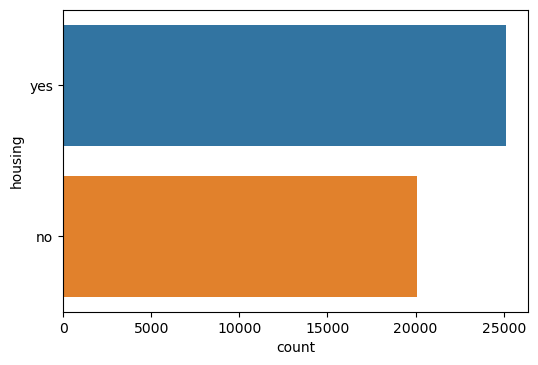

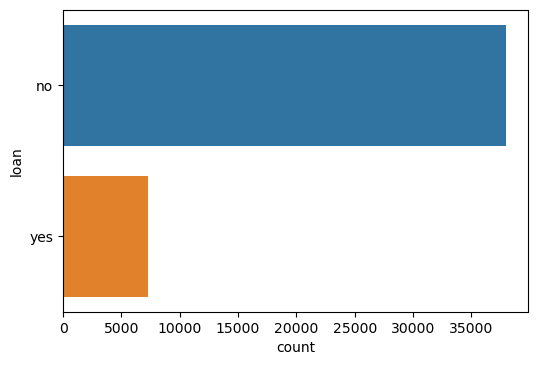

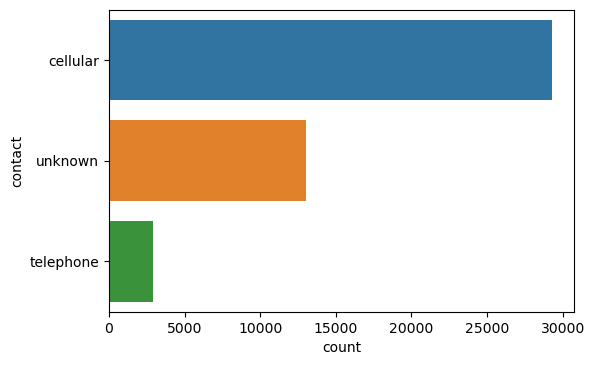

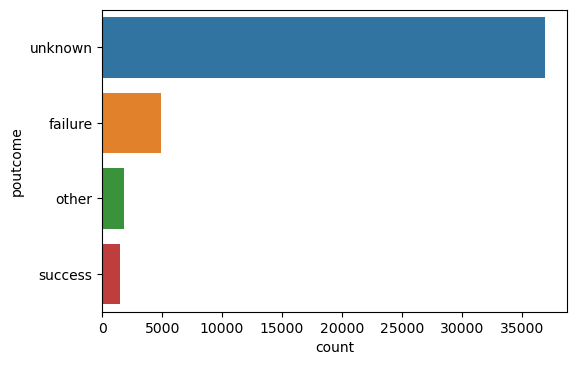

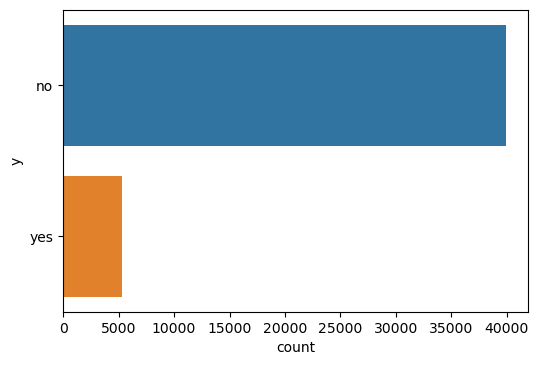

In [81]:
#Bar plots of categorical features
for feature in Banking.dtypes[Banking.dtypes == 'object'].index:
    sns.countplot(y=feature, data=Banking, order = Banking[feature].value_counts().index)
    plt.show()

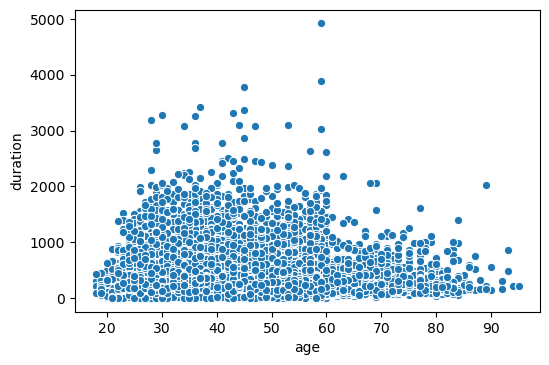

In [67]:
sns.scatterplot(x=Banking['age'], y=Banking['duration']);

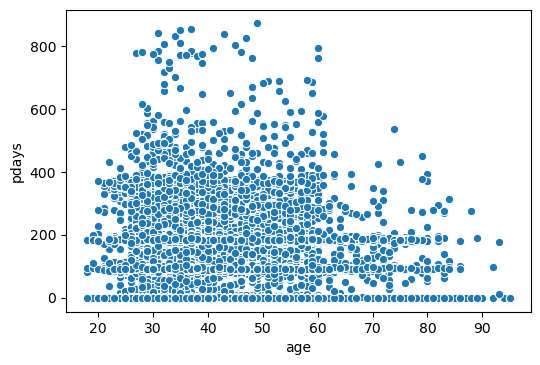

In [68]:
sns.scatterplot(x=Banking['age'], y=Banking['pdays']);

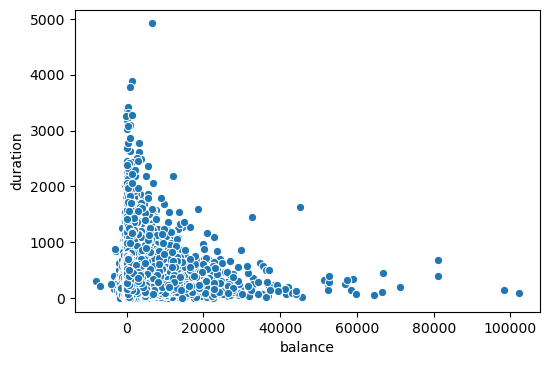

In [69]:
sns.scatterplot(x=Banking['balance'], y=Banking['duration']);

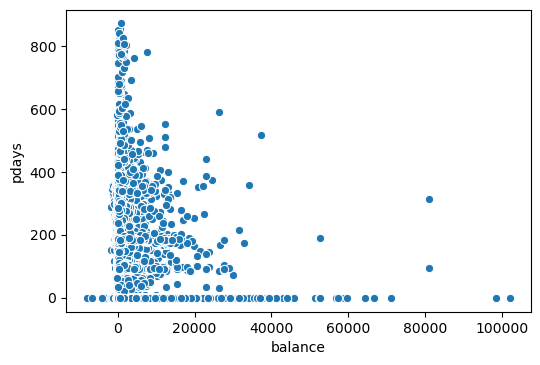

In [70]:
sns.scatterplot(x=Banking['balance'], y=Banking['pdays']);

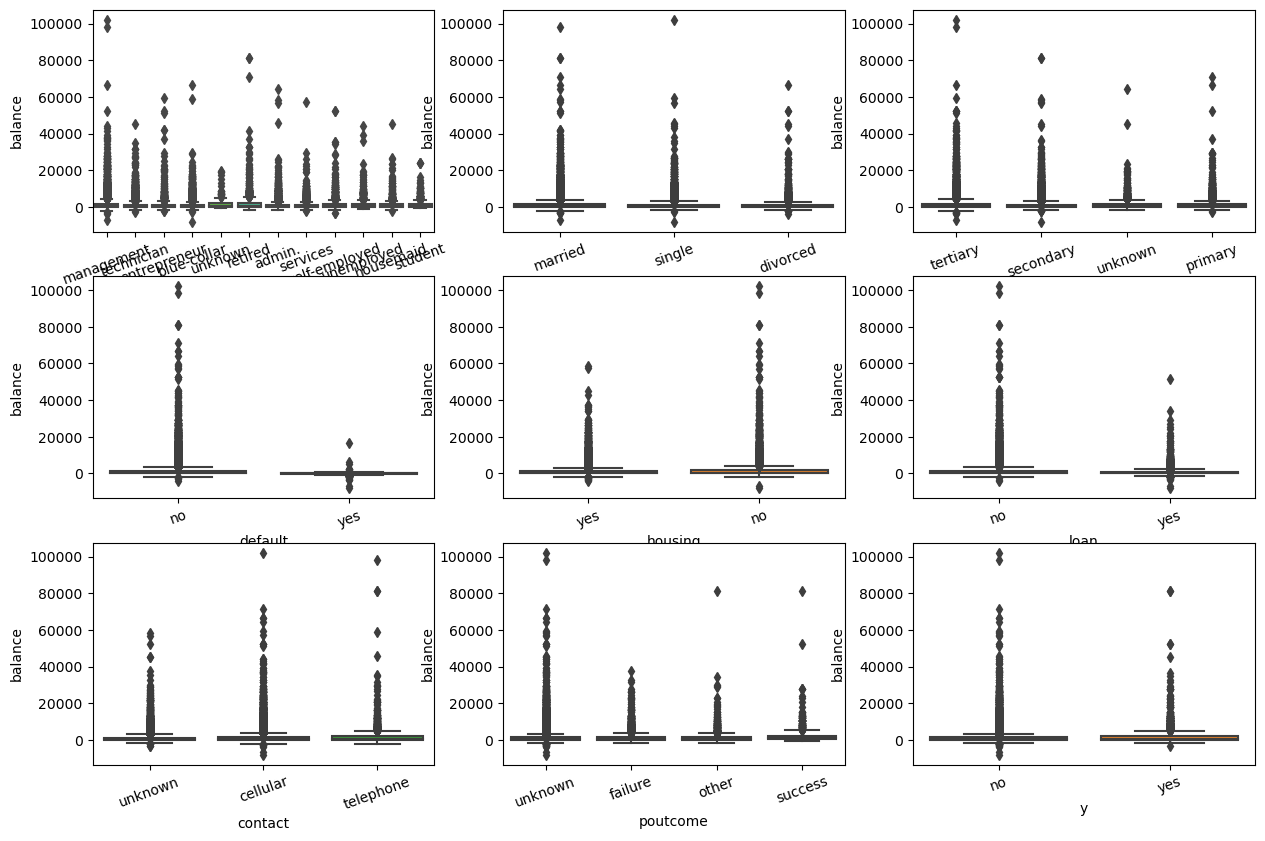

In [73]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='balance', data=Banking, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(20)

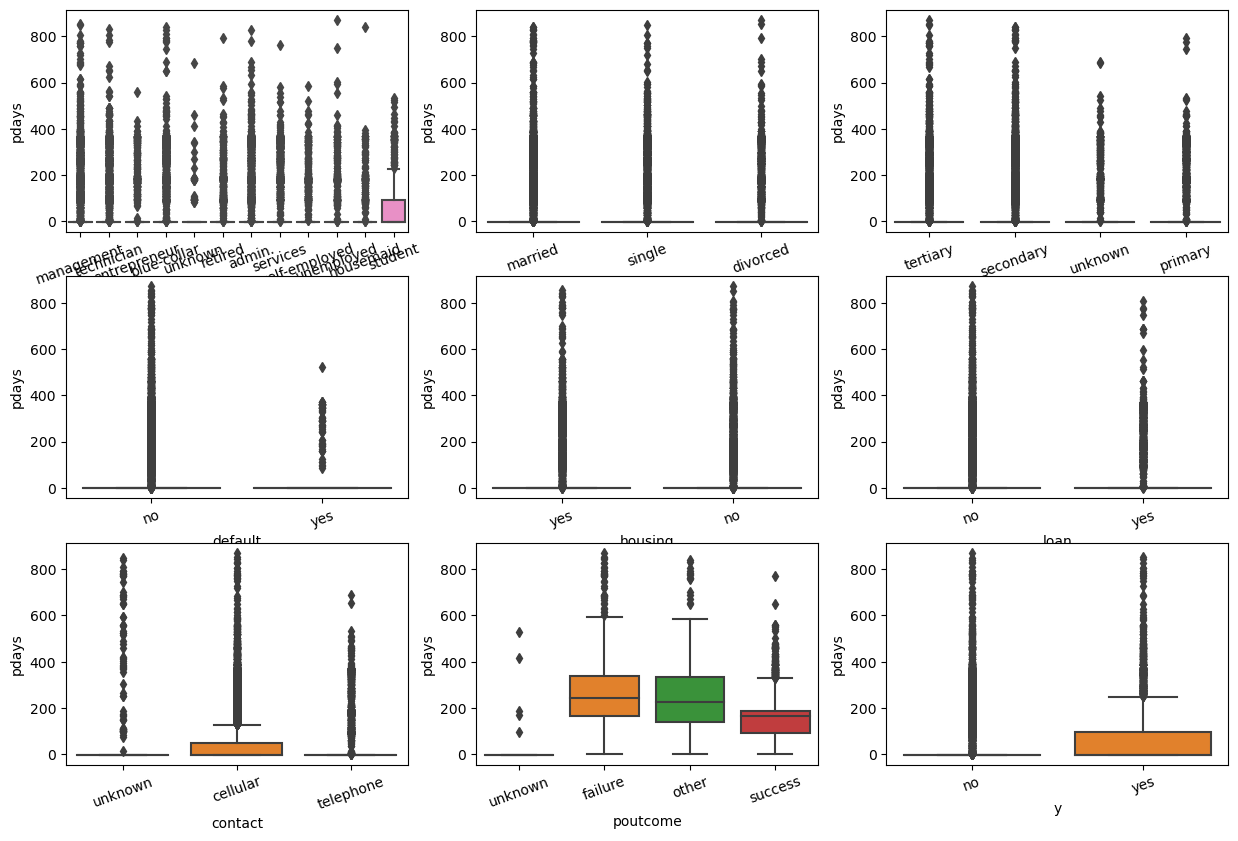

In [74]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='pdays', data=Banking, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(20)

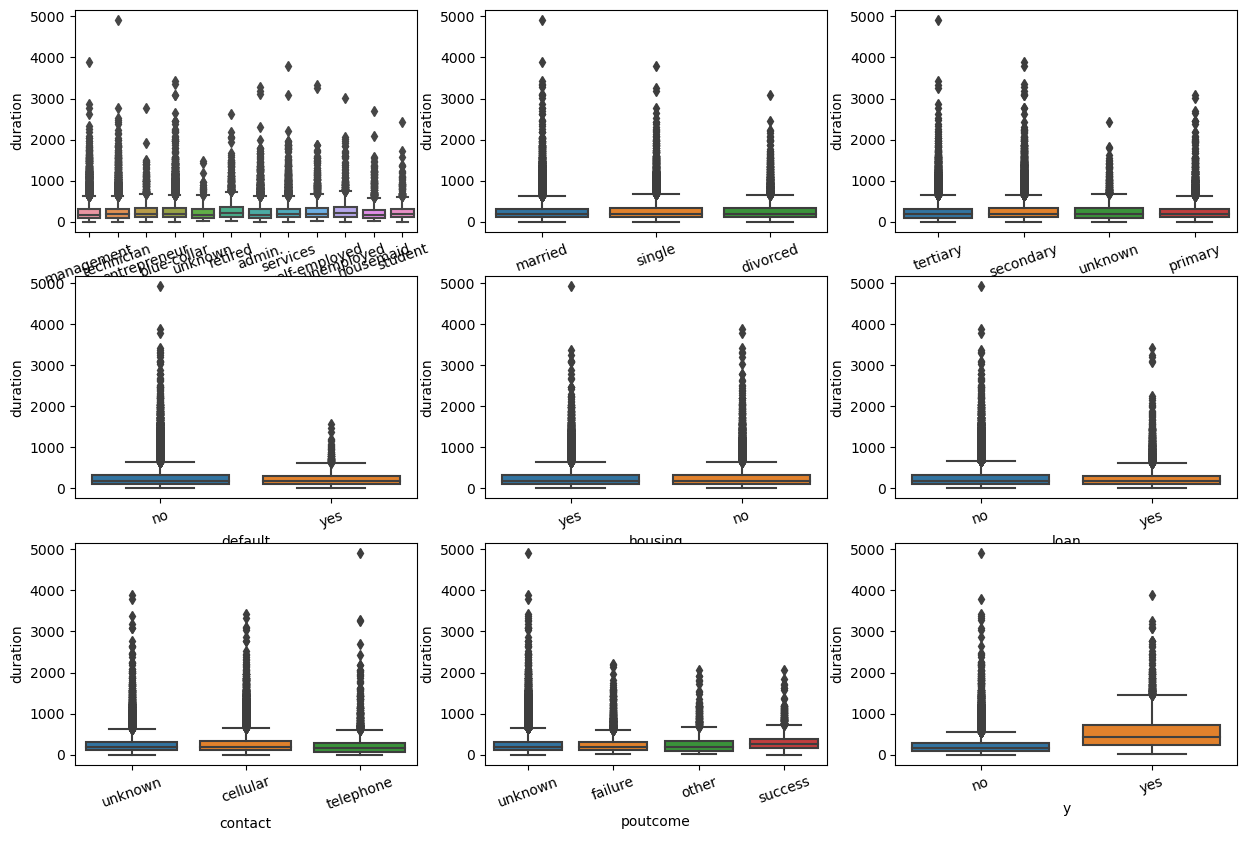

In [75]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='duration', data=Banking, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(20)

In [ ]:
sorted_nb = housing.groupby(['Neighborhood'])['SalePrice'].median().sort_values()
sns.boxplot(x=housing['Neighborhood'], y=housing['SalePrice'], order=list(sorted_nb.index))

In [109]:
Banking.job.value_counts()/Banking.job.count()

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

In [108]:
Banking.marital.value_counts()/Banking.marital.count()

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

In [106]:
Banking.education.value_counts()/Banking.education.count()

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

In [105]:
Banking.default.value_counts()/Banking.default.count()

no     0.981973
yes    0.018027
Name: default, dtype: float64

In [104]:
Banking.housing.value_counts()/Banking.housing.count()

yes    0.555838
no     0.444162
Name: housing, dtype: float64

In [103]:
Banking.loan.value_counts()/Banking.loan.count()

no     0.839774
yes    0.160226
Name: loan, dtype: float64

In [102]:
a=Banking.month.value_counts()/Banking.month.count()
a.sort_index()

1     0.031032
2     0.058592
3     0.010551
4     0.064851
5     0.304483
6     0.118135
7     0.152507
8     0.138174
9     0.012807
10    0.016323
11    0.087810
12    0.004733
Name: month, dtype: float64

In [89]:
Banking.poutcome.value_counts()/Banking.poutcome.count()

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

In [90]:
Banking.y.value_counts()/Banking.y.count()

no     0.883015
yes    0.116985
Name: y, dtype: float64

In [82]:
#Creating a copy of the original data frame
df_cleaned = Banking.copy()
#Dropping the unknown job level
df_cleaned = df_cleaned[df_cleaned.job != 'unknown']
#Dropping the unknown marital status
df_cleaned = df_cleaned[df_cleaned.marital != 'unknown']
#Dropping the unknown and illiterate education level
df_cleaned = df_cleaned[df_cleaned.education != 'unknown']
df_cleaned = df_cleaned[df_cleaned.education != 'illiterate']
#Deleting the 'default' column
del df_cleaned['default']
#Deleting the 'duration' column
del df_cleaned['duration']
#Dropping the unknown housing loan status
df_cleaned = df_cleaned[df_cleaned.housing != 'unknown']
#Dropping the unknown personal loan status
df_cleaned = df_cleaned[df_cleaned.loan != 'unknown']

In [110]:
#Combining entrepreneurs and self-employed into self-employed
df_cleaned.job.replace(['entrepreneur', 'self-employed'], 'self-employed', inplace=True)
#Combining administrative and management jobs into admin_management
df_cleaned.job.replace(['admin.', 'management'], 'administration_management', inplace=True)
#Combining blue-collar and tecnician jobs into blue-collar
df_cleaned.job.replace(['blue-collar', 'technician'], 'blue-collar', inplace=True)
#Combining retired and unemployed into no_active_income
df_cleaned.job.replace(['retired', 'unemployed'], 'no_active_income', inplace=True)
#Combining services and housemaid into services
df_cleaned.job.replace(['services', 'housemaid'], 'services', inplace=True)
#Combining single and divorced into single
df_cleaned.marital.replace(['single', 'divorced'], 'single', inplace=True)
#Combining basic school degrees
df_cleaned.education.replace(['basic.9y', 'basic.6y', 'basic.4y'], 'basic_school', inplace=True)

In [120]:
df_cleaned.head()

,age,balance,campaign,pdays,previous,day,month,job,marital,education,housing,loan,contact,poutcome,y
0,58,2143,1,-1,0,5,5,administration_management,married,tertiary,yes,no,unknown,unknown,no
1,44,29,1,-1,0,5,5,blue-collar,single,secondary,yes,no,unknown,unknown,no
2,33,2,1,-1,0,5,5,self-employed,married,secondary,yes,yes,unknown,unknown,no
5,35,231,1,-1,0,5,5,administration_management,married,tertiary,yes,no,unknown,unknown,no
6,28,447,1,-1,0,5,5,administration_management,single,tertiary,yes,yes,unknown,unknown,no


In [121]:
a = df_cleaned.poutcome.value_counts()
a.sort_index()

failure     4709
other       1774
success     1424
unknown    35286
Name: poutcome, dtype: int64

In [126]:
b = df_cleaned.pdays.value_counts()
print(a['unknown'], b[-1])

35286 35281


In [128]:
c = df_cleaned.previous.value_counts()
print(c[0])

35281


In [129]:
not_matching = df_cleaned.loc[(df_cleaned['pdays']==-1)&(Banking['poutcome']!='nonexistent')]

In [130]:
not_matching.poutcome.value_counts()

unknown    35281
Name: poutcome, dtype: int64